In [41]:
import pandas as pd
import numpy as np

In [42]:
#xls = pd.ExcelFile("Comments (2).xlsx")
df = pd.read_excel('Comments (2).xlsx')

In [43]:
df.head()

,comment_id,Comment
0,5,djfjkdfjkjkffdk edited
1,41,Faith has exhibited enthusiasm in taking on th...
2,49,He now has now understood the structure of gra...
3,50,The Intern was oriented on ICT setup and Infra...
4,52,The student was oriented on the organization s...


In [44]:
df.Comment=df.Comment.astype(str)

<Strong>Analyzing text statistics</Strong>

Text statistics visualizations are simple but very insightful techniques. 

They include:
<ul>
    <li>word frequency analysis,</li>
    <li>sentence length analysis,</li>
    <li>average word length analysis,</li>
    <li>etc.</li>
</ul>

Those really help explore the fundamental characteristics of the text data.

To do so, we will be mostly using histograms (continuous data) and bar charts (categorical data).

<AxesSubplot:>

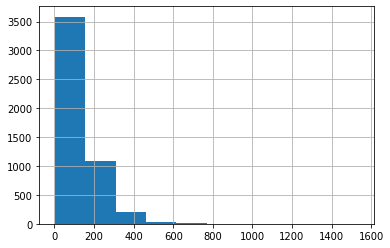

In [45]:
df['Comment'].str.len().hist()



The histogram shows that comments range from 0 to 300 characters

<strong>We look at the average word length in each comment</strong>

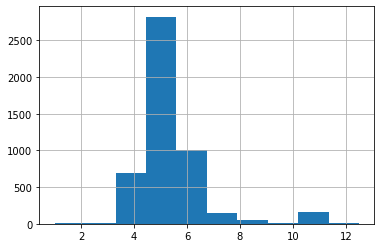

In [48]:
df['Comment'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
df['word_length'] = df['Comment'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
df.to_csv('word_length.csv')

The average word length ranges between 4 to 6 with 5 being the most common length.

Cleaning the text data with various operations:

In [5]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [6]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [7]:
# clean text data
df["review_clean"] = df["Comment"].apply(lambda x: clean_text(x))

In [8]:
df.head()

,comment_id,Comment,review_clean
0,5,djfjkdfjkjkffdk edited,djfjkdfjkjkffdk edit
1,41,Faith has exhibited enthusiasm in taking on th...,faith exhibit enthusiasm take project hand alr...
2,49,He now has now understood the structure of gra...,understood structure grail different component...
3,50,The Intern was oriented on ICT setup and Infra...,intern orient ict setup infrastructure soroti ...
4,52,The student was oriented on the organization s...,student orient organization structure develop ...


<p>To clean textual data, we call our custom ‘clean_text’ function that performs several transformations:</p>

<ul>
<li>lower the text</li>
<li>tokenize the text (split the text into words) and remove the punctuation</li>
<li>remove useless words that contain numbers</li>
<li>remove useless stop words like ‘the’, ‘a’ ,’this’ etc.</li>
<li>Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database</li>
<li>lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)</li>
</ul>
<p>Now that we have cleaned our data, we can do some feature engineering for our modelization part.</p>

In [9]:
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.parsing.preprocessing import STOPWORDS
import nltk

Tokenize the comments

Let’s tokenize each sentence into a list of words

In [10]:
result = []
for sentence in df["review_clean"]:
     tokens = [word for word in sentence.split()]
     result.append(tokens)
    

In [11]:
##create dictionary based on the preprocessed_documents
dictionary = gensim.corpora.Dictionary(result)

dictionary

In [12]:
##check the dictionary
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 5:
        break

0 djfjkdfjkjkffdk
1 edit
2 already
3 concept
4 core
5 discover


In [13]:
## remove extreme words (very common and very rare)
dictionary.filter_extremes(no_below=15, no_above=0.1)

##create bag-of-word model for each documents
bow_corpus = [dictionary.doc2bow(doc) for doc in result]

In [14]:
bow_corpus

[[],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1)],
 [(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)],
 [(12, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(20, 1),
  (26, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1)],
 [(38, 1)],
 [(13, 1), (39, 1)],
 [(2, 1), (24, 1), (40, 1), (41, 1)],
 [(42, 1)],
 [(43, 1), (44, 1), (45, 1), (46, 1), (47, 1)],
 [(48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)],
 [(24, 1), (49, 1), (54, 1), (55, 1), (56, 1)],
 [(49, 1)],
 [(24, 1),
  (45, 1),
  (47, 1),
  (50, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1)],
 [(12, 1), (13, 1), (38, 1), (56, 1)],
 [(46, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)],
 [(67, 1), (68, 1), (69, 1), (70, 1), (71, 1)],
 [(25, 1), (46, 1), (64, 1), (72, 1), (73, 1)],
 [(35, 1),
  (64, 1),


Our Corpus is as below:

In [15]:
## check the bow_corpus
bow_doc_100 = bow_corpus[3]

for i in range(len(bow_doc_100)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_100[i][0], 
                                                     dictionary[bow_doc_100[i][0]], 
                                                     bow_doc_100[i][1]))

Word 12 ("take") appears 1 time.
Word 22 ("ict") appears 1 time.
Word 23 ("intern") appears 1 time.
Word 24 ("learn") appears 1 time.
Word 25 ("lot") appears 1 time.
Word 26 ("orient") appears 1 time.
Word 27 ("setup") appears 1 time.
Word 28 ("start") appears 1 time.
Word 29 ("university") appears 1 time.


In [16]:
bow_corpus[:3]

[[],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1)],
 [(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]]

In [17]:
# Human readable format of corpus (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in bow_corpus[:3]]

[[],
 [('already', 1),
  ('concept', 1),
  ('enthusiasm', 1),
  ('exhibit', 1),
  ('forward', 1),
  ('go', 1),
  ('hand', 1),
  ('look', 1),
  ('project', 1),
  ('show', 1),
  ('sign', 1),
  ('software', 1),
  ('take', 1),
  ('time', 1),
  ('understand', 1)],
 [('component', 1),
  ('different', 1),
  ('get', 1),
  ('process', 1),
  ('relate', 1),
  ('structure', 1),
  ('understood', 1)]]

We now build a model to cluster the comments

LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.

In [18]:
lda_model = gensim.models.LdaMulticore(bow_corpus, # Stream of document vectors or sparse matrix of shape 
                                       num_topics=5, # The number of requested latent topics to be extracted from the training corpus.
                                       id2word = dictionary, #Mapping from word IDs to words. It is used to determine the vocabulary size. 
                                       passes = 50, #Number of passes through the corpus during training.
                                       workers=10) #Number of workers processes to be used for parallelization.

In [19]:
##print out the key words of five topics
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.036*"progressive" + 0.024*"able" + 0.022*"knowledge" + 0.021*"php" + 0.018*"practice" + 0.016*"database" + 0.016*"student" + 0.015*"computer" + 0.014*"problem" + 0.014*"also"


Topic: 1 
Words: 0.050*"end" + 0.048*"report" + 0.044*"acquire" + 0.041*"new" + 0.037*"detail" + 0.037*"do" + 0.033*"suppose" + 0.033*"explain" + 0.030*"finish" + 0.027*"present"


Topic: 2 
Words: 0.032*"learn" + 0.030*"team" + 0.021*"week" + 0.017*"time" + 0.017*"project" + 0.014*"great" + 0.014*"keep" + 0.012*"student" + 0.012*"progress" + 0.011*"intern"


Topic: 3 
Words: 0.043*"app" + 0.035*"set" + 0.032*"device" + 0.028*"server" + 0.026*"mobile" + 0.025*"also" + 0.024*"configure" + 0.019*"week's" + 0.018*"web" + 0.017*"network"


Topic: 4 
Words: 0.045*"week" + 0.034*"week's" + 0.031*"system" + 0.030*"start" + 0.024*"design" + 0.021*"go" + 0.021*"hands-on" + 0.019*"lead" + 0.017*"next" + 0.017*"practical"




In [20]:
documents_lda_topics = pd.DataFrame(columns = ["Excellent", "Good", "Neutral", "Poor", "Very Poor"])
for i in range(len(bow_corpus)):
    if i % 50 ==0:
        print(i)
    documents_lda_topics.loc[i] = [0] * 5

    output = lda_model.get_document_topics(bow_corpus[i])
    for j in range(len(output)):
        a = output[j][0]
        b = output[j][1]
        documents_lda_topics.iloc[i,a] = b

#print("Data processing finished")

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900


In [21]:
## pick the final topic for each abstract based on max-probability
for i in range(5):
    documents_lda_topics.iloc[:, i] = documents_lda_topics.iloc[:, i].astype('float64', copy=False)
    
documents_lda_topics["final_topic"] =documents_lda_topics.iloc[:, :10].idxmax(axis=1)

In [22]:
##preview the dataframe for both models
print("LDA + bow_corpus: topic probability:")
documents_lda_topics.head(5)

LDA + bow_corpus: topic probability:


,Excellent,Good,Neutral,Poor,Very Poor,final_topic
0,0.200000,0.200000,0.200000,0.200000,0.200000,Excellent
1,0.012817,0.093595,0.684831,0.012574,0.196183,Neutral
2,0.736172,0.025065,0.188383,0.025011,0.025368,Excellent
3,0.020116,0.129164,0.717743,0.020166,0.112810,Neutral
4,0.437338,0.019447,0.506360,0.018436,0.018419,Neutral


In [23]:
out = df.join(documents_lda_topics)
out.to_csv('results.csv')
out

,comment_id,Comment,review_clean,Excellent,Good,Neutral,Poor,Very Poor,final_topic
0,5,djfjkdfjkjkffdk edited,djfjkdfjkjkffdk edit,0.200000,0.200000,0.200000,0.200000,0.200000,Excellent
1,41,Faith has exhibited enthusiasm in taking on th...,faith exhibit enthusiasm take project hand alr...,0.012817,0.093595,0.684831,0.012574,0.196183,Neutral
2,49,He now has now understood the structure of gra...,understood structure grail different component...,0.736172,0.025065,0.188383,0.025011,0.025368,Excellent
3,50,The Intern was oriented on ICT setup and Infra...,intern orient ict setup infrastructure soroti ...,0.020116,0.129164,0.717743,0.020166,0.112810,Neutral
4,52,The student was oriented on the organization s...,student orient organization structure develop ...,0.437338,0.019447,0.506360,0.018436,0.018419,Neutral
...,...,...,...,...,...,...,...,...,...
4932,8159,Tasks and goals set at the start of the intern...,task goal set start internship realize time ma...,0.351826,0.020405,0.366471,0.135523,0.125775,Neutral
4933,8160,Needs more support to accomplish the pending t...,need support accomplish pending task,0.353938,0.050419,0.495285,0.050354,0.050004,Neutral
4934,8161,Positive attitude towards work. Keep it up,positive attitude towards work keep,0.040001,0.040007,0.839990,0.040001,0.040001,Neutral
4935,8162,The the intern is more committed to accomplish...,intern commit accomplish task,0.050187,0.050137,0.799612,0.050002,0.050062,Neutral


In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def get_wordcloud(topic):

  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

  cloud = WordCloud(stopwords=STOPWORDS,
                    background_color='white',
                    width=2500,
                    height=1800,
                    max_words=10,
                    colormap='tab20',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

  topics = topic.show_topics(formatted=False)

  fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

  for i, ax in enumerate(axes.flatten()):
      fig.add_subplot(ax)
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')


  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis('off')
  plt.margins(x=0, y=0)
  plt.tight_layout()
  plt.show()

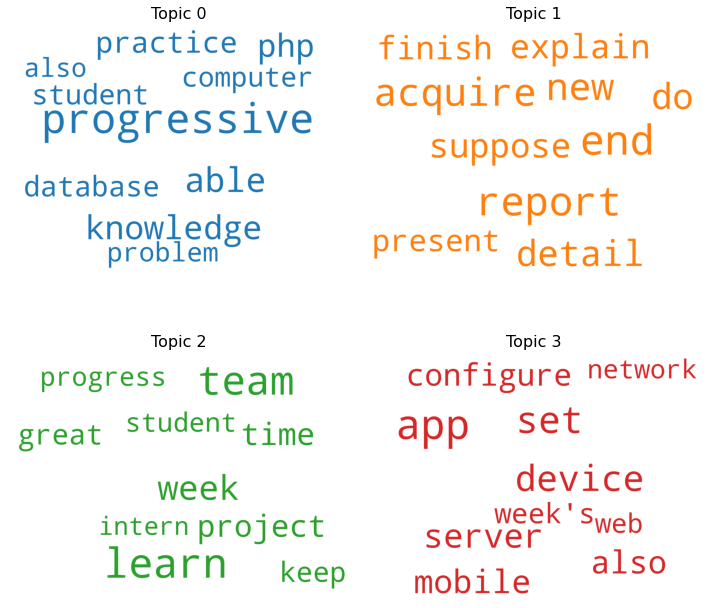

In [25]:
get_wordcloud(topic= lda_model)

In [26]:
from gensim.models import CoherenceModel# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=result, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.40089633975645694


In [27]:
import pyLDAvis.gensim_models 
import pickle 
import pyLDAvis# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
LDAvis_prepared

c:\Users\Samuel.Kizza\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.189170 -0.084101       1        1  31.856343
3      0.299745  0.038159       2        1  19.619584
0     -0.055104 -0.201218       3        1  16.825539
4      0.096697 -0.003318       4        1  16.531776
1     -0.152167  0.250478       5        1  15.166758, topic_info=         Term        Freq       Total Category  logprob  loglift
456       app  322.000000  322.000000  Default  30.0000  30.0000
225    report  275.000000  275.000000  Default  29.0000  29.0000
37       week  532.000000  532.000000  Default  28.0000  28.0000
161       end  351.000000  351.000000  Default  27.0000  27.0000
30    acquire  288.000000  288.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
141      also   51.812029  447.405428   Topic5  -4.7115  -0.2698
281  business   32.974901   63.482082   Topic5  -5.1634   1.2311
145  practice   34.896997  177.598583   Topic5  -5.1068   0.2589
35    student   36.292197  334.670455   Topic5  -5.0676  -0.3355
382       cod   34.693956  235.949177   Topic5  -5.1126  -0.0310

[307 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
648       4  0.976352      -deployed
649       4  0.967084     -installed
657       1  0.967793  -successfully
650       4  0.986703        -worked
43        1  0.123319           able
...     ...       ...            ...
433       2  0.301288        without
433       3  0.044873        without
433       4  0.653860        without
505       3  0.349869          write
505       5  0.645072          write

[455 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 5, 2])

Create a Named Entity Recognition (NER) model that takes in a comment as an input and outputs the Entities, if any, belonging to the categories: Person, Organization, Place/Location, Time 

In [28]:
#importing necessary libraries 
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")  #creating an object and loading the pre-trained model for "English" 

c:\Users\Samuel.Kizza\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\image_utils.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': pil_image.NEAREST,
c:\Users\Samuel.Kizza\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\image_utils.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': pil_image.BILINEAR,
c:\Users\Samuel.Kizza\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\image_utils.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': pil_image.BICUBIC,
c:\Users\Samuel.Kizza\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\image_utils.py:39: DeprecationWarning: HAMMING is deprecated and will be removed in Pillow 10 (20

In [29]:
sentence = "Apple is looking at buying U.K. startup for $1 billion"
  
doc = nlp(sentence)
  
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [30]:
for ent in doc.ents:
  print(ent.text,"|", ent.label_)

Apple | ORG
U.K. | GPE
$1 billion | MONEY
